In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
              'theme': 'serif',
              'transition': 'none',
              'start_slideshow_at': 'selected',
})

{'start_slideshow_at': 'selected', 'theme': 'serif', 'transition': 'none'}

In [3]:
from IPython.display import Image

# Introduction to Data Science

Data Analytic thinking helps you view business problems from a data perspective and understand the principles of extracting useful knowledge from data. A "data perspective" means a framework to systematically analyze problems through the use of data.

# Data Science vs Data Mining

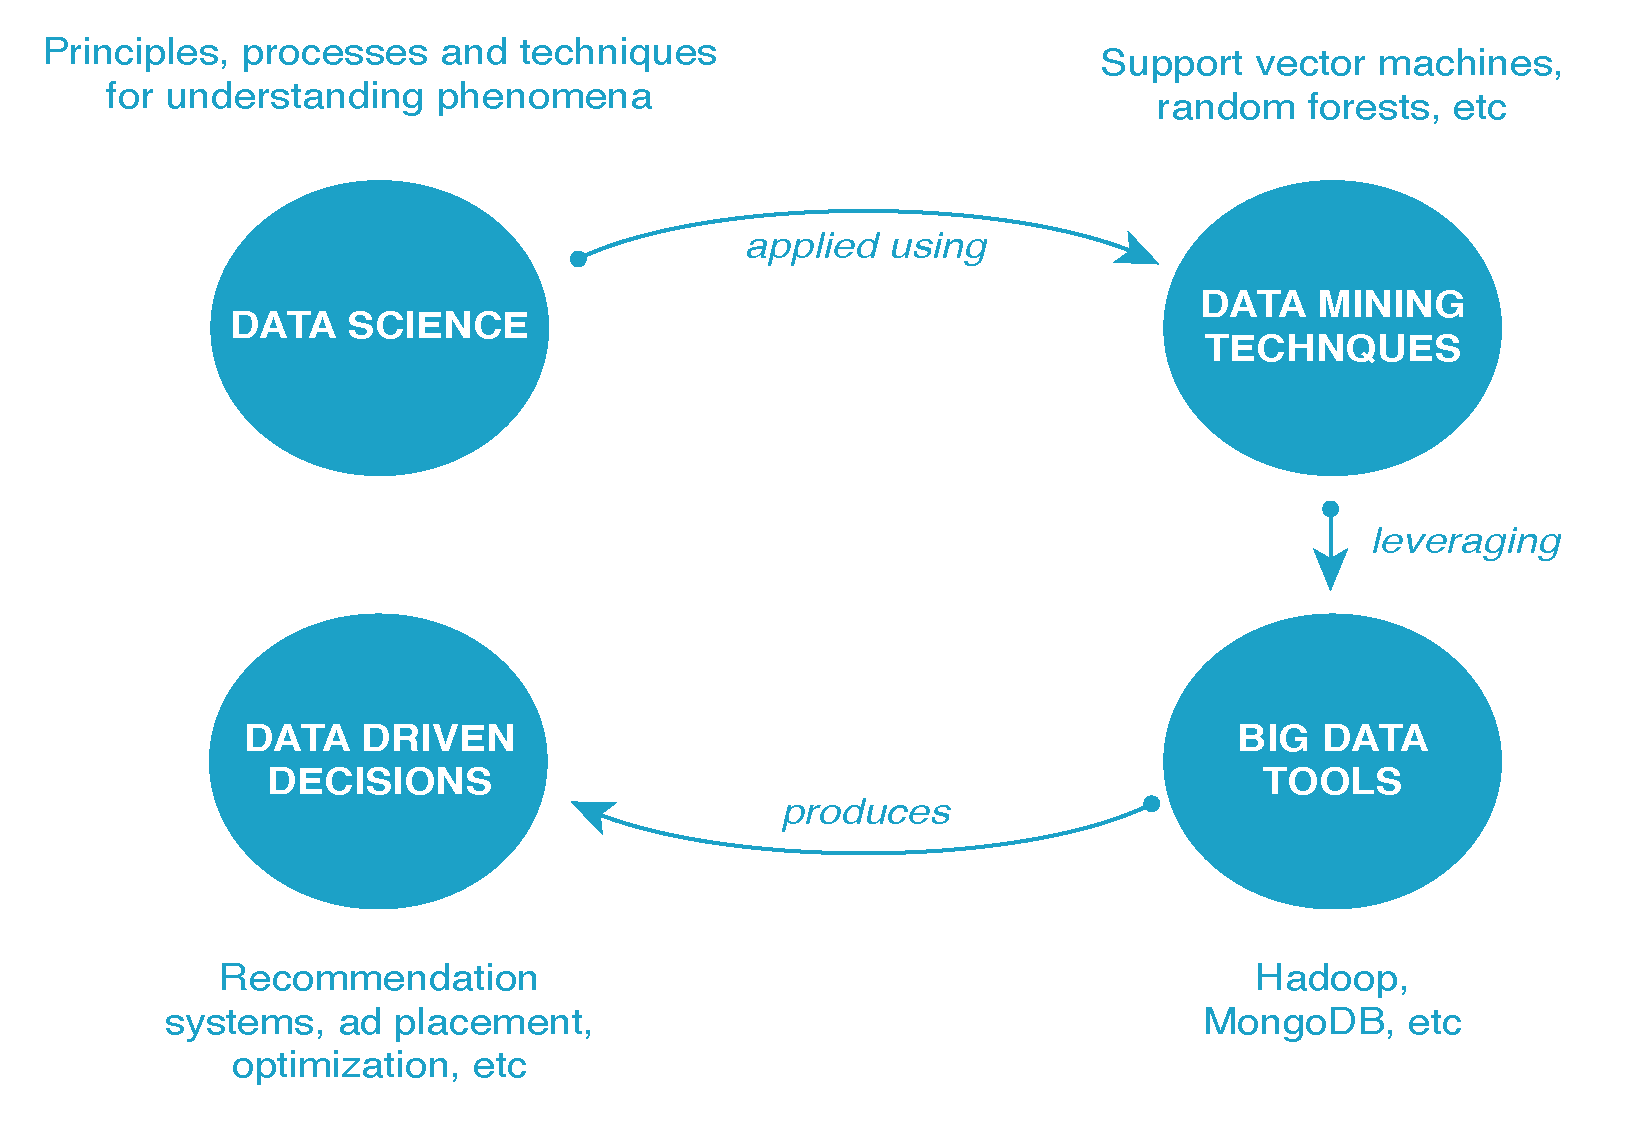

In [5]:
Image(filename='ipyimages/datascience_vs_datamining-45.png')  

# Data Driven Decision Making

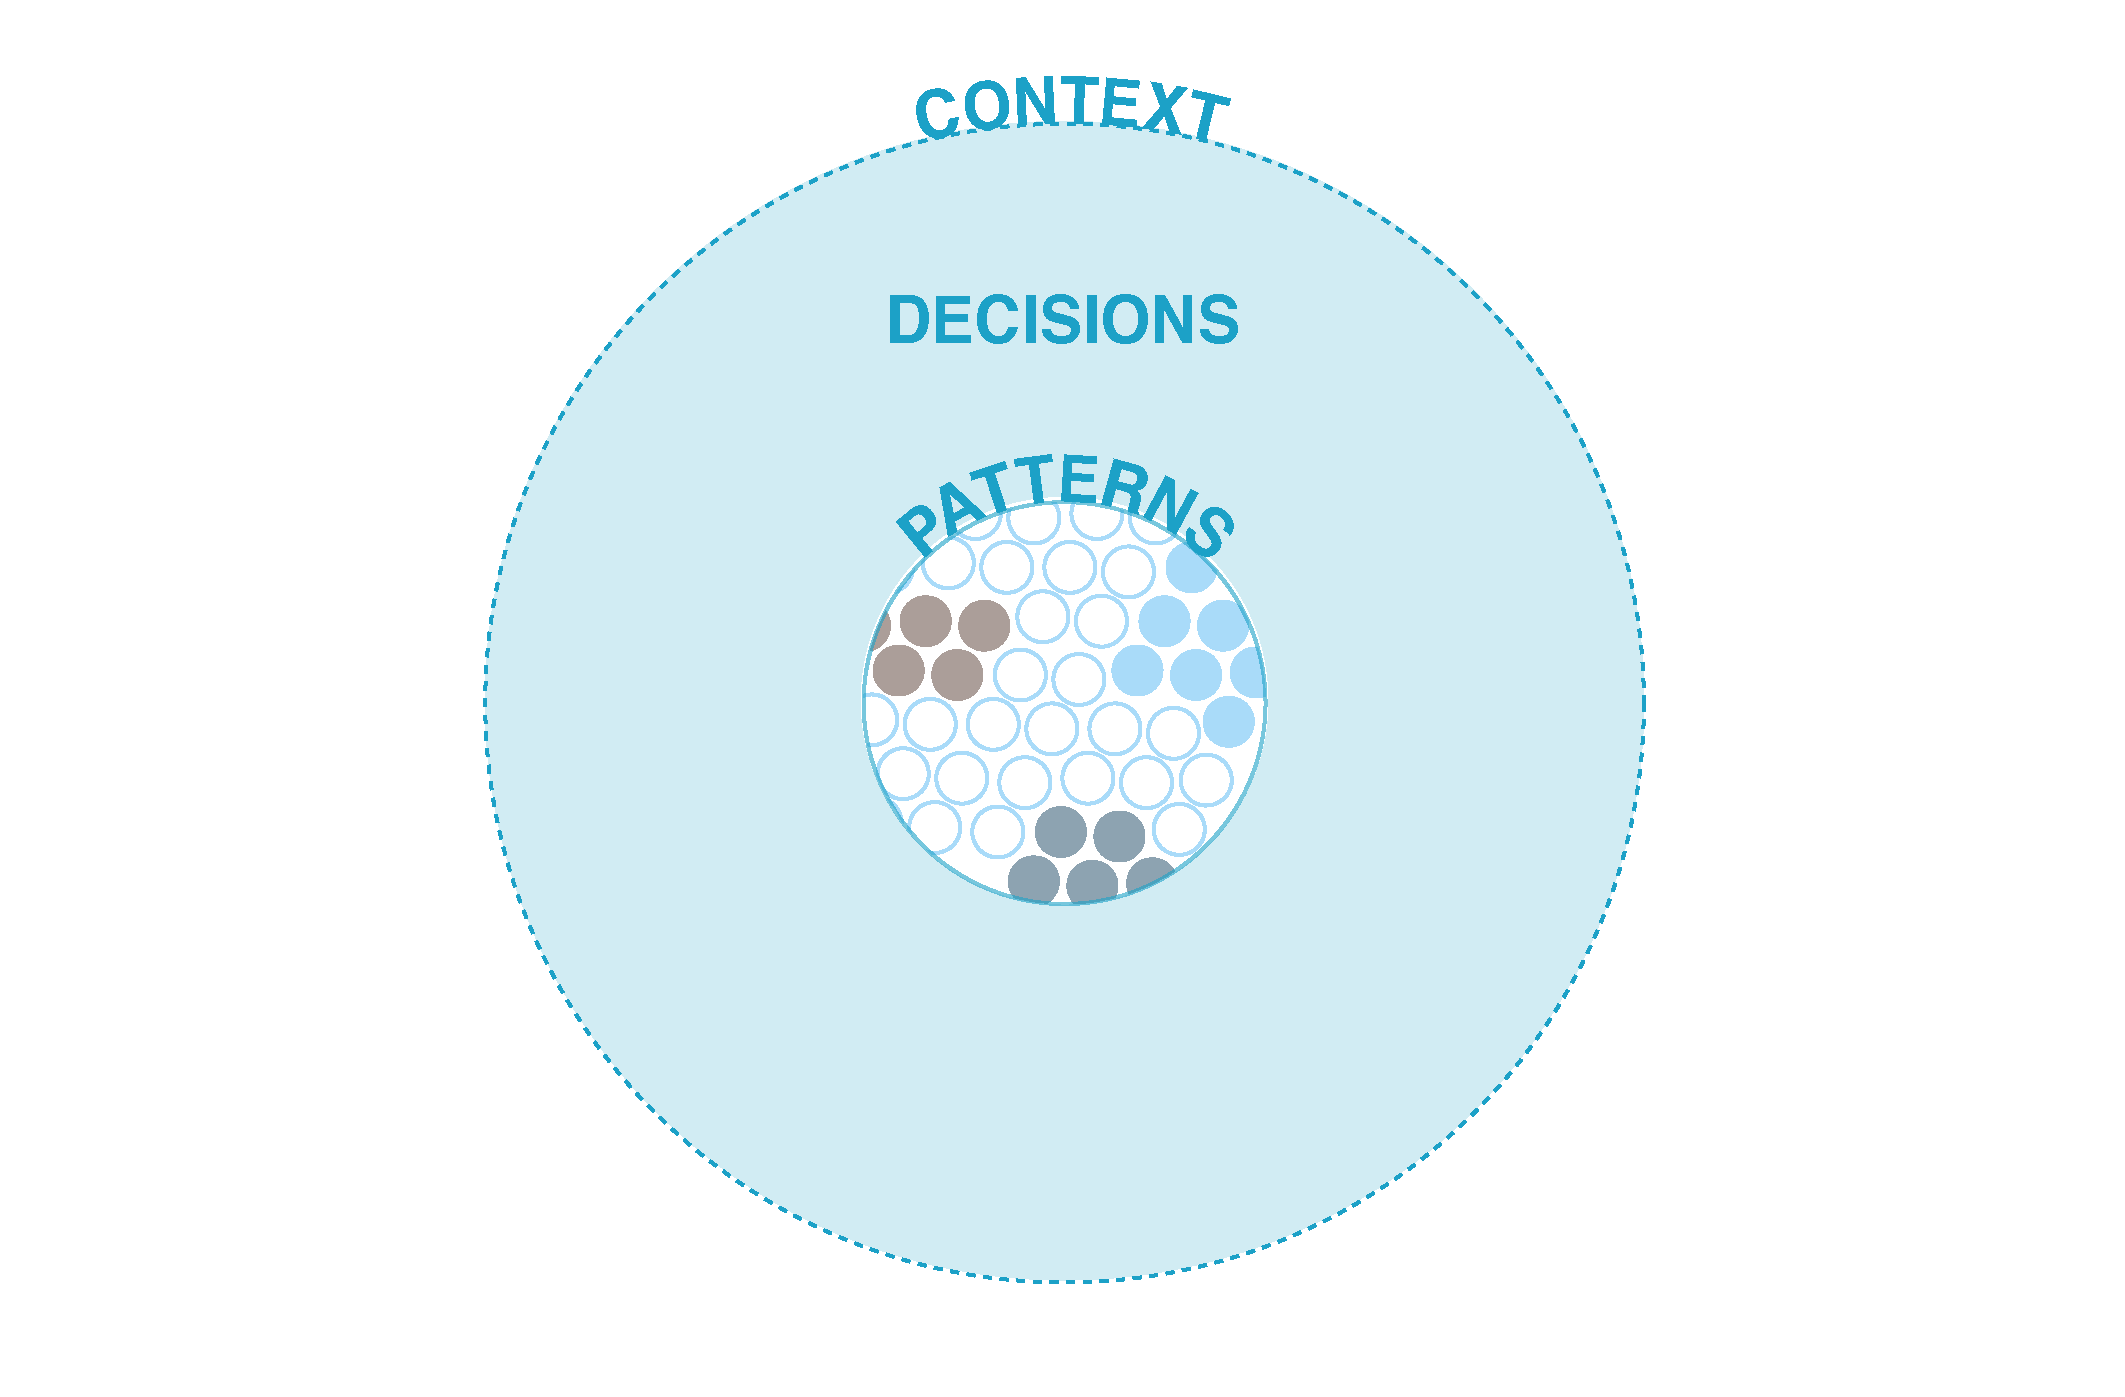

In [12]:
Image(filename='ipyimages/DDD-40.png')  

Data Driven Decision making is the practice of basing decisions on the analysis of data, rather than purely on intuition

Data science is a set of fundamental principles that guide the extraction of knowledge from data, while Data mining is the extraction of knowledge from data, via technologies that implement these principles. So basically, data science is applied using data mining techniques

# Predictive Modeling

Predictive modeling is one of the main topics of data mining and can range from correlation to supervised segmentation

# Supervised Segmentation

The first concept within predictive modeling is supervised segmentation. Consider this example of a movie subscription service, like netflix, where there is a movie database and history of whether a person watched a movie or not. Based on this history, we would like to predict which movie out of a potential list of unwatched movies, the person is likely to watch in the future. So the "quantity of interest" is whether the person will watch a particular movie or not. This quantity of interest is sometimes also called the terget variable.  Figuring out how we can segment this historical dataset (or what we can call "population") into groups with respect to the target variable, which is the likelihood of watching a movie is supervised segmentation. Additionally, in this case we are talking about predicting a Yes or No value for the target, which means we are doing a "classification" as opposed to a regression. A regression is to predict a numeric value for the target, so if we were predicting the likelihood of watching, in terms of a comparative score, we would be doing a regression instead of a classification

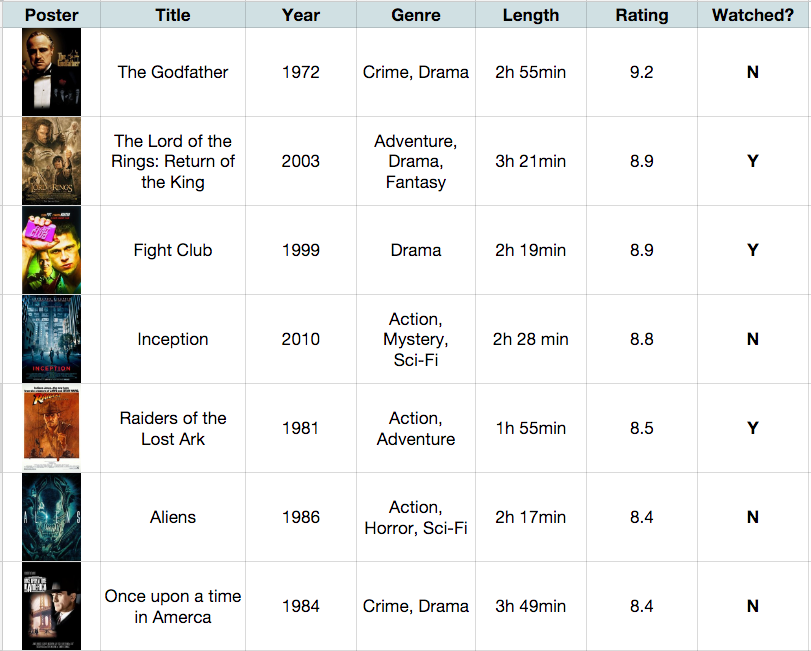

In [14]:
Image(filename='ipyimages/movie_list.png')  

The first part of supervised segmentation is to select the important informative attributes. An informative attribute is something that *reduces uncertainity* about the target variable. Let's for example assume for a second that we are mind readers and perfectly understand a person's preferences. The person prefers the drama genre over others , but doesn't really care about the length of the movie. In this case the genere of the movie is informative (or reduces the uncertainity) of predicting whether a person will watch a movie or not. However the movie length is not informative because it doesn't contribute to reducing the uncertainty of whether or not the person will watch a movie.

A single row of atrributes represent what is called a Feature vector. As an example of a feature vector here is: [ The Godfather, 1972, Crime/Drama, 2h55min, 9min ]. Each attribute in the feature vector is also called a feature value. The attribute *Watched?* is the target variable. 

# Models, induction and deduction

So basically we need a systematic mechanism or *Model* to find informative attributes in order to find informative attributes. The process of creating models from data is called **Induction** and the procedure that creates a model from the data is called a *learner* or *induction algorithm*. Induction essentially refers to generalizing from a specific case to general rules. We use the process of induction to create models from training data, which in this case is the historical movie dataset and then use *deduction* to use the models to predict target values for instances of feature vectors.

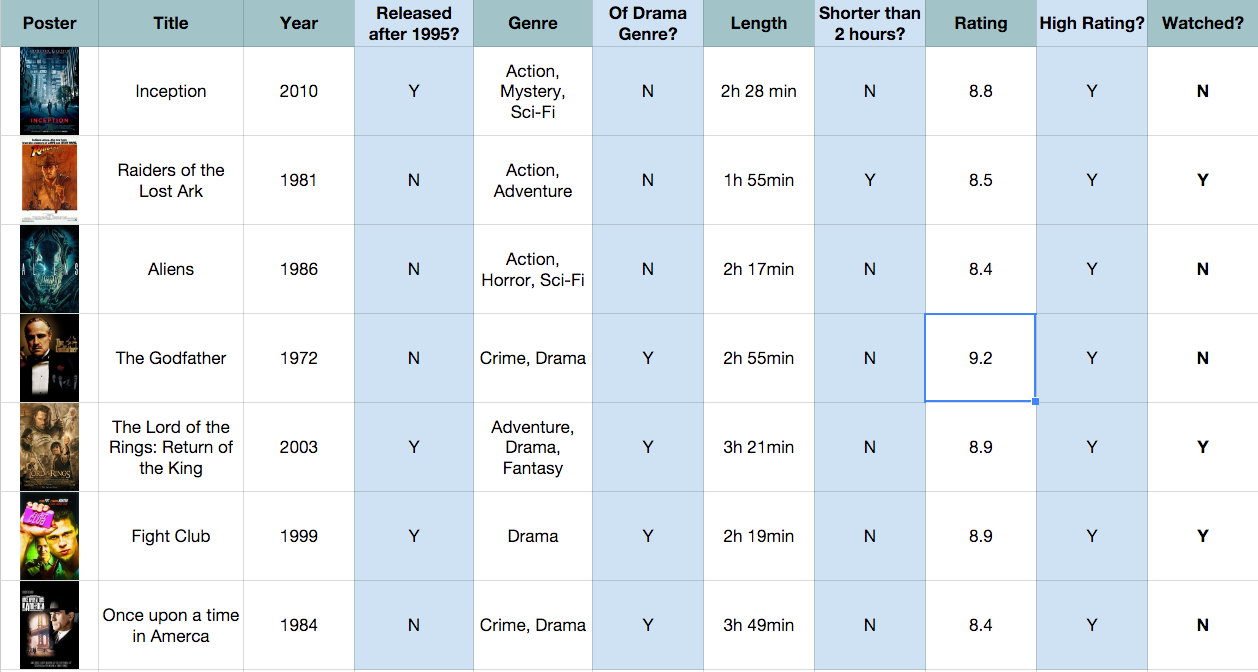

In [16]:
Image(filename='ipyimages/movie_list_extended.png')  

Now lets try to create a model to figure out the single most informative attribute. For simplicity, I have created boolean values out of each of the attribute values. As an example, the *Year* column is substituted by the *Released after 1995* column that has a Yes or a No value. So what attribute gives us the most information about whether a movie was watched or not? Whether it was released after 1995? Whether it's of Drama Genre? Whether it's shorter than 2 hrs or whether it has high rating? 

Lets pick one attribute *Of Drama Genre* which has a possible values of Y or N. In this list of 7 movies we can see that when *Of Drama Genre* is Y, the target variable *Watched* has values of (N, Y, Y, N) which is 50% Y's and 50% N's. So the attribute *Of Drama Genre* taken on it's own corresponds to a highly random result of for *Watched?*. In other words it produces results of a high entropy, which is a measure of randomness. Now lets take *Of Drama Genre* in conjunction with the attribute *Released after 1995?*. If *Of Drama Genre* = Y and *Released after 1995* = Y then the value of *Watched?* becomes (Y,Y) and *Of Drama Genre* = Y and *Released after 1995* = N, gives a value of *Watched?* = (N,N). This means that a combination of *Of Drama Genre* and *Released after 1995* gives a resut of least randomness. In fact, the randomness in this example is zero. 

Mathematically, entropy is defined as the following measure of probability

$entropy = - p_1 log (p_1) - p_2 log (p_2) - ... $

Without getting into the details of this equation, we can say that entropy can be numerically calculated. We could extend this to determine how much an attribute decreases entropy of the segmentation it creates. This is also called *information gain* where the information gain measures the the change in entropy 

Now lets take a look at the historical dataset. There are a total of 7 movies, with 3 of them watched and 4 unwatched movies. The probability of a watched movie is 3/7 = 42%. Lets partition this data into 2 segments based on the *Of Drama Genre Variable* into two segments. Segment 1 = *Of Drama Genre* = Y and Segment 2 = *Of Drama Genre* = N. Now Segment 1 has *Watched?* values of (N,Y, Y, N), which means a probability of Watched = 50% and Segment 2 has *Watched?* values of (N, Y, N) which means a probablity of Watched  = 33.3%. Comparing with the overall probability of of Watched - 42%, we have an important insight that movies of Genre = Drama have a higher probability of being watched. Now let us see if we can further segment this population by the *Released before 1995* variable. When we do this, we get (Y, Y). So we learn that a combination of 